# [EDA To Prediction (DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)


### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.*
                                                                                       -Lisa Kleypas

                                                                                                                                     

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912년 4월 15일, 그녀의 첫 항해 동안, 타이타닉은 빙산과 충돌한 후 가라앉았고, 2224명의 승객과 승무원 중 1502명이 사망했습니다. 그래서 이름이 **DieTanic**입니다.  이것은 세상 누구도 잊을 수 없는 매우 잊을 수 없는 재앙입니다.

타이타닉을 만드는 데 약 750만 달러가 들었고 충돌로 인해 바다 밑으로 가라앉았습니다. 타이타닉 데이터 세트는 초보자들이 데이터 과학 여행을 시작하고 카글에서 열리는 대회에 참가하기에 매우 좋은 데이터 세트입니다.

이 노트북의 목표는 **예측 모델링 문제에서 워크플로우가 어떠한지 **에 대한 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 기계 학습 개념을 추가하는 방법. 저는 초보자도 노트북의 모든 단계를 이해할 수 있도록 가능한 한 기본적인 노트북을 유지하려고 노력했습니다.

만약 당신이 노트북을 좋아하고 그것이 당신에게 도움이 되었다고 생각한다면..**투표 부탁드립니다**. 그것은 저에게 동기부여를 해줄 것입니다.

## 노트북의 내용:

### 1부: 탐색적 데이터 분석(EDA):
1. 형상 분석.

2. 여러 기능을 고려하여 관계 또는 추세를 찾습니다.

### 2부: 기능 엔지니어링 및 데이터 정리:
1. 몇 가지 기능을 추가합니다.

2. 중복 기능을 제거합니다.

3. 형상을 모델링에 적합한 형태로 변환합니다.

### 파트 3: 예측 모델링
1. 기본 알고리즘을 실행하고 있습니다.

2. 교차 검증.

3. 조립 중.

4. 중요한 기능 추출입니다.

## Part1: Exploratory Data Analysis(EDA)

In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# os.getcwd()
data=pd.read_csv('/content/drive/MyDrive/Aiffel_Nodes/kaggle/input/train.csv')

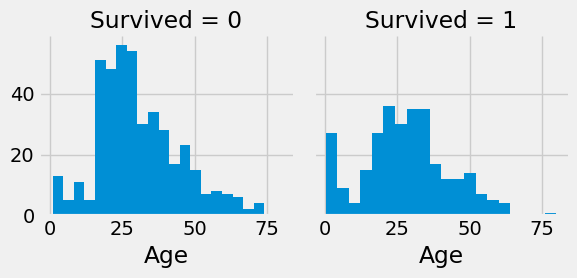

In [89]:
g = sns.FacetGrid(data, col='Survived') # facetGrid() 함수를 사용하여 train_df 테이블에서 Survived 열에 따라 plot 생성
g.map(plt.hist, 'Age', bins = 20)   

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Survived : 0 = 사망, 1 = 생존
* Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
* Sex : male = 남성, female = 여성
* Age : 나이
* SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
* Parch : 타이타닉 호에 동승한 부모 / 자식의 수
* Ticket : 티켓 번호
* Fare : 승객 요금
* Cabin : 방 호수
* Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [ ]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**연령, 객실 및 탑승자**의 값은 null입니다. 제가 고치도록 노력하겠습니다.

## 생존자는 몇 명입니까??

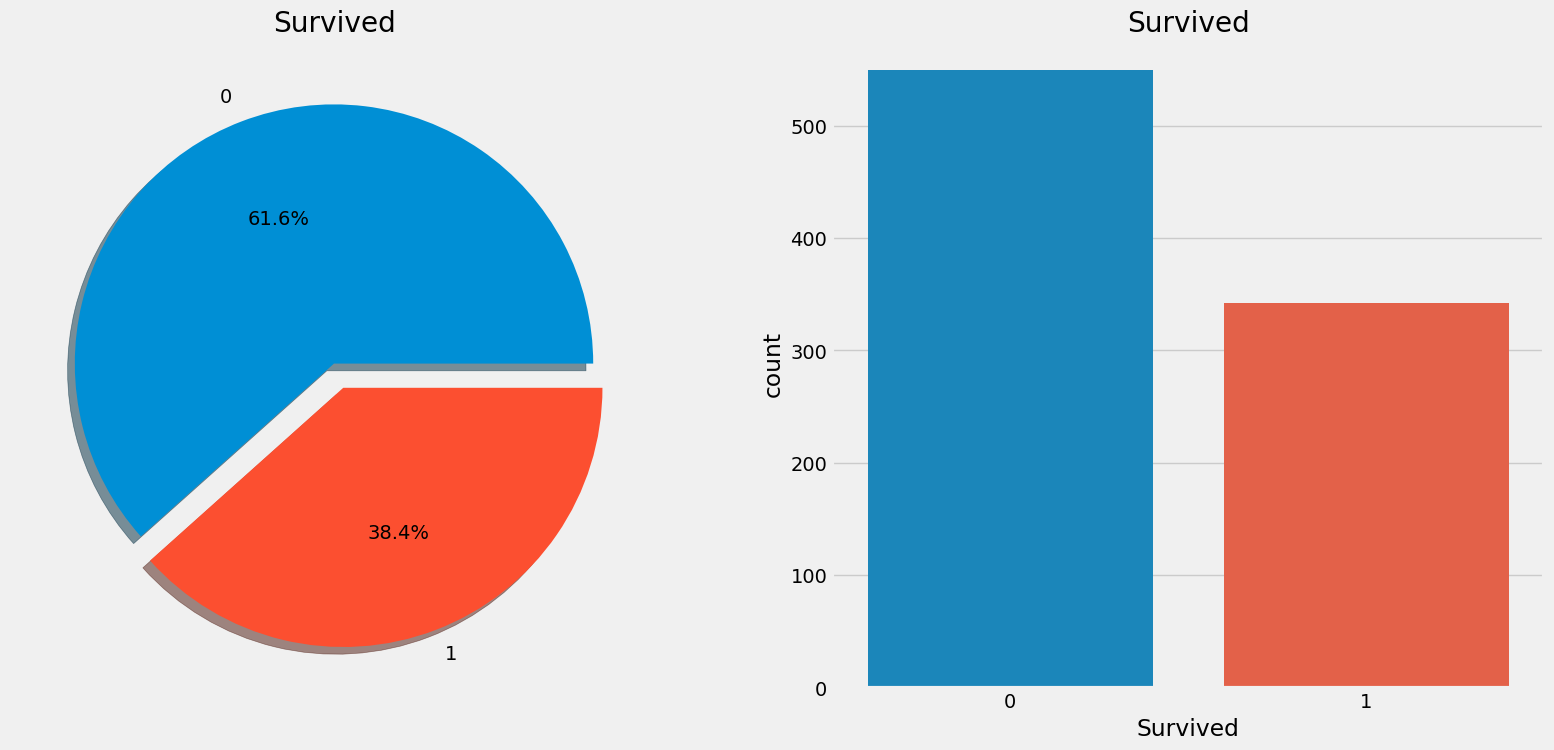

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# explode : 분해할 양을 지정
# autopct='%1.1f%%' : 백분율의 형식을 지정
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

그 사고에서 살아남은 승객이 많지 않다는 것은 명백합니다. 

**훈련 세트에 있던 891명의 승객 중 약 350명만이 살아남았습니다.** 즉, 총 훈련 세트 중 **38.4%**만이 추락에서 살아남았습니다. 우리는 데이터로부터 더 나은 통찰력을 얻고 어떤 범주의 승객들이 살아남았는지, 누가 살아남지 못했는지를 알기 위해 더 깊이 파고들 필요가 있습니다.

우리는 데이터 세트의 다양한 기능을 사용하여 생존율을 확인하려고 노력할 것입니다. 특징으로는 성별, 출항항, 연령 등이 있습니다.

먼저 다양한 유형의 기능에 대해 알아보겠습니다.

## 피쳐 유형

### Categorical Feature(범주형 특징):
범주형 변수는 두 개 이상의 범주가 있는 변수이며 이들에 의해 해당 피쳐의 각 값을 범주화할 수 있습니다.예를 들어, 성별은 두 개의 범주(남성 및 여성)를 가진 범주형 변수입니다. 이제 이러한 변수를 정렬하거나 순서를 지정할 수 없습니다. 이러한 변수는 **공칭 변수**라고도 합니다.

**데이터 세트의 범주적 특징: 성별, 출항항(C:셰르부르, Q=퀸즈타운, S=사우샘프턴).**

### Ordinal Feature(순서형 특징):
순서형 변수는 범주형 값과 비슷하지만 값 사이에 상대적인 순서나 정렬이 가능하다는 점이 다릅니다. 예를 들어 **높이**와 같이 **높이, 중간, 짧은** 값을 가진 기능이 있는 경우 높이는 순서형 변수입니다. 여기서는 변수를 상대적으로 정렬할 수 있습니다.

**데이터 세트의 순서형 기능: PClass(1등석, 2등석, 3등석)**

### Continous Feature(연속 특징):
형상은 두 점 사이의 값 또는 형상 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 연속형이라고 합니다.

**데이터 세트의 연속 기능: 나이**

## Analysing The Features(기능 분석)

## Sex--> Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

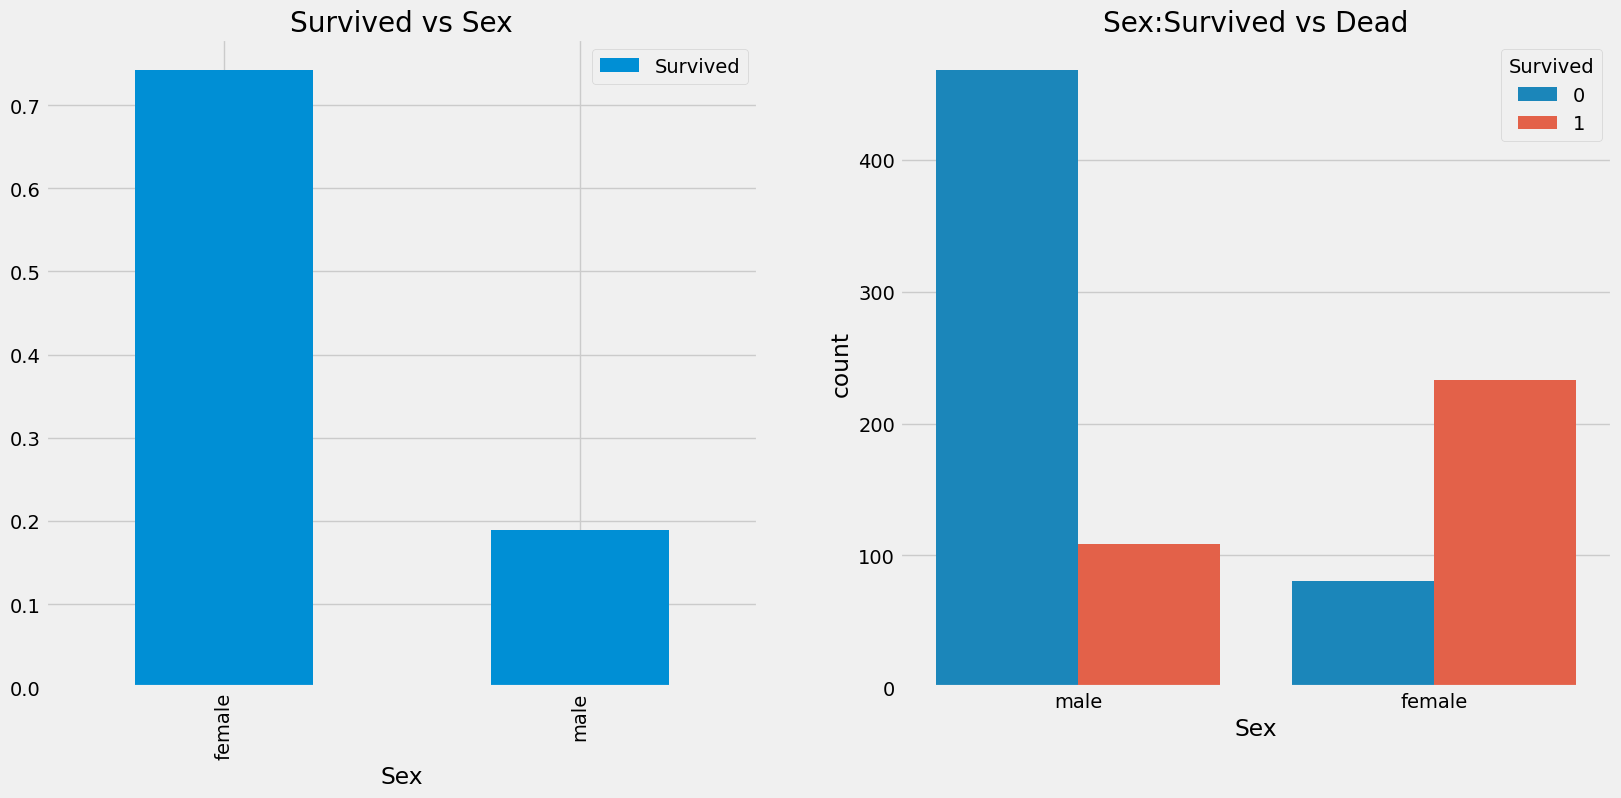

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

이것은 흥미로워 보입니다. 배에 타고 있는 남자의 수는 여자의 수보다 훨씬 많습니다. 그럼에도 불구하고 여성의 수는 남성의 수보다 거의 두 배나 많습니다. 배에 타고 있는 **여성의 생존율은 약 75%인 반면, 남성의 생존율은 약 18-19%입니다.**

이 기능은 모델링에 **매우 중요한** 기능인 것 같습니다. 하지만 그게 최고일까요??   다른 기능을 확인해 보겠습니다.

## Pclass --> Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


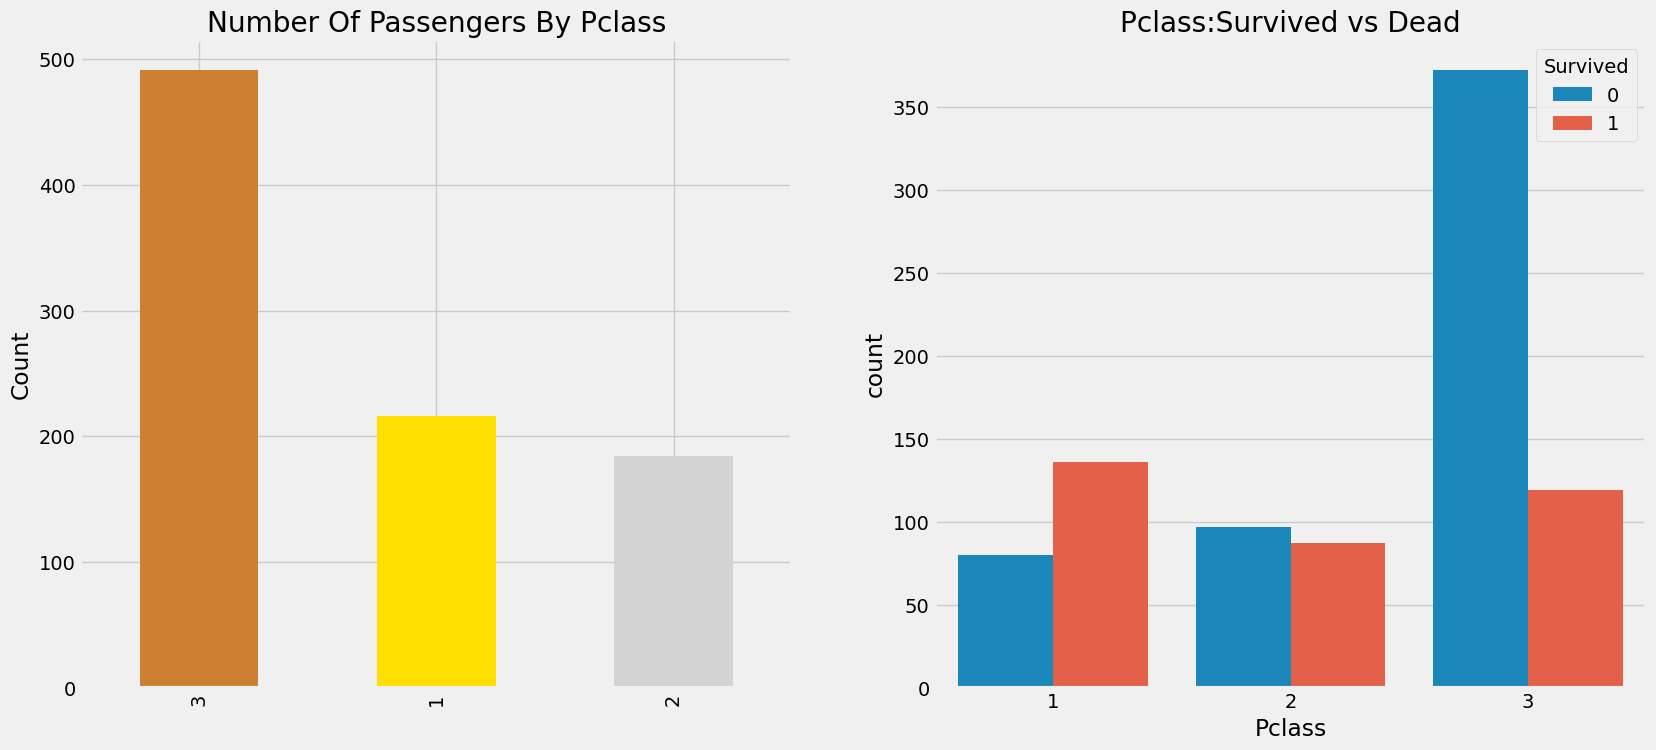

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 **돈으로 모든 것을 살 수는 없다고 말합니다.** 하지만 우리는 P 클래스 1의 Passenger들이 구조 중에 매우 높은 우선순위를 부여받았다는 것을 분명히 알 수 있습니다. P 클래스 3의 승객 수는 훨씬 더 많았지만, 생존자 수는 약 **25%**로 매우 낮습니다.

Pclass 1의 경우 생존율은 약 **63%**인 반면 Pclass 2의 경우 약 **48%**입니다. 그래서 돈과 지위가 중요합니다. 물질만능주의적인 세상.

조금 더 자세히 살펴보고 다른 흥미로운 관측치를 확인해 보겠습니다. **Sex and Pclass** Together로 생존율을 확인해 보겠습니다.

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

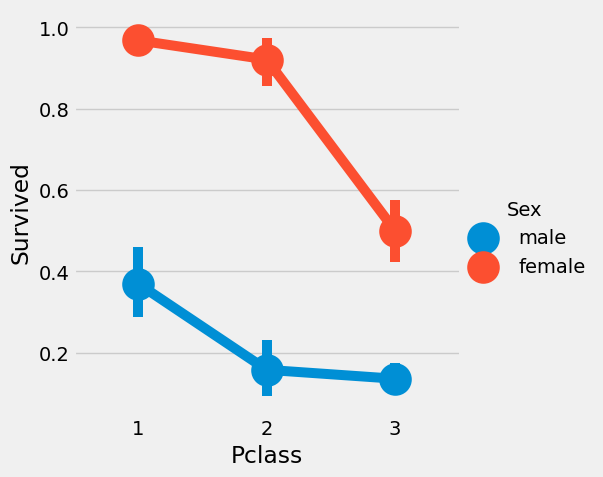

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data, kind="point") 
# 원래 factorplot 이었지만 최신 sns에서 쓰이지 않는다. 위와 같이 catplot 종류에 포함
plt.show()

이 경우 **요인도**를 사용하면 범주형 값을 쉽게 구분할 수 있습니다.

**CrossTab**과 **FactorPlot**을 보면, Pclass1의 여성 생존율은 약 **95-96%**로 Pclass1의 여성 94명 중 3명만 사망했기 때문에 쉽게 추론할 수 있습니다. 

P클래스와 상관없이 구조 중 여성에게 최우선 순위가 부여된 것은 분명합니다. 심지어 P클래스 1의 남성들도 생존율이 매우 낮습니다.

P클래스도 중요한 기능인 것 같습니다. 다른 기능을 분석해 보겠습니다.

## Age--> Continous Feature


In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


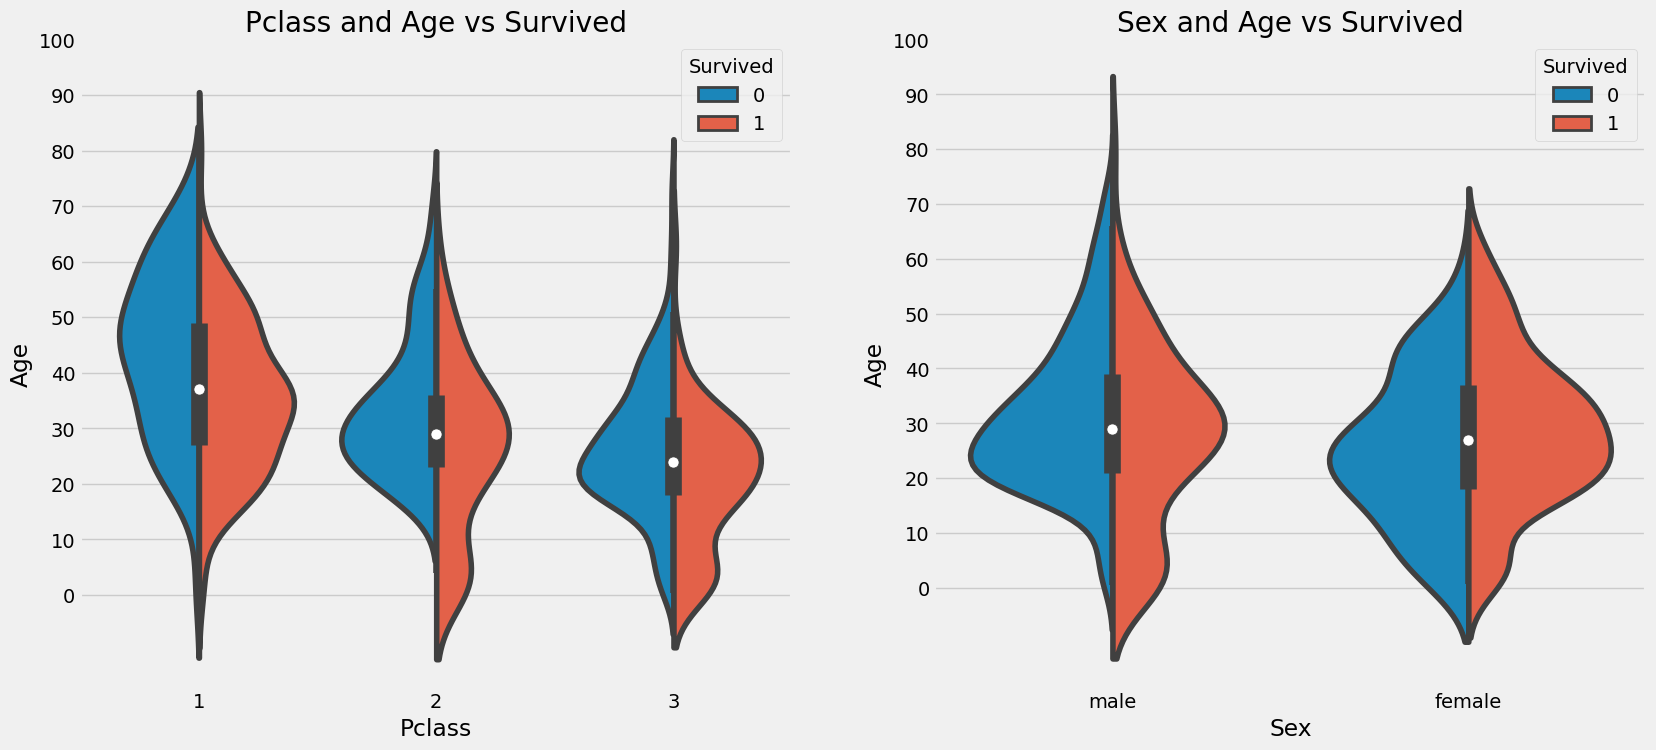

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 관측치:

1. 어린이의 수는 P 클래스에 따라 증가하며 10세 미만의 승객(즉, 어린이)의 생존율은 P 클래스에 관계없이 양호한 것으로 보입니다.

2. Pclass1에서 20-50세 사이의 Passenger의 생존 가능성은 높고 여성에게는 더욱 좋습니다.

3. 남성의 경우, 생존 가능성은 나이가 들수록 감소합니다.

앞서 살펴본 바와 같이 연령 기능에는 **177** null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많았다는 것입니다. 우리는 평균 나이가 29세인 4살짜리 아이를 배정할 수 없습니다. 승객이 거짓말을 하는 연령대를 알 수 있는 방법이 있습니까??

**빙고!!!!**, **Name** 기능을 확인할 수 있습니다. 특징을 보면, 우리는 그 이름들이 Mr. 또는 Mrs.와 같은 경례를 가지고 있다는 것을 알 수 있습니다. 따라서 Mrs와 Mrs의 평균값을 각 그룹에 할당할 수 있습니다.

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

자, 여기서는 정규식을 사용합니다. **[A-Za-z]+)\.**. 따라서 **A-Z 또는 a-z** 사이에 있고 **.(점)** 뒤에 오는 문자열을 찾습니다. 이름에서 이니셜을 성공적으로 추출했습니다.

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme와 같은 철자가 틀린 이니셜이 Miss를 나타냅니다. 저는 그것들을 Miss로 바꾸고 다른 값들도 같은 것으로 바꿀 것입니다.

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [ ]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any() #So no null values left finally 

False

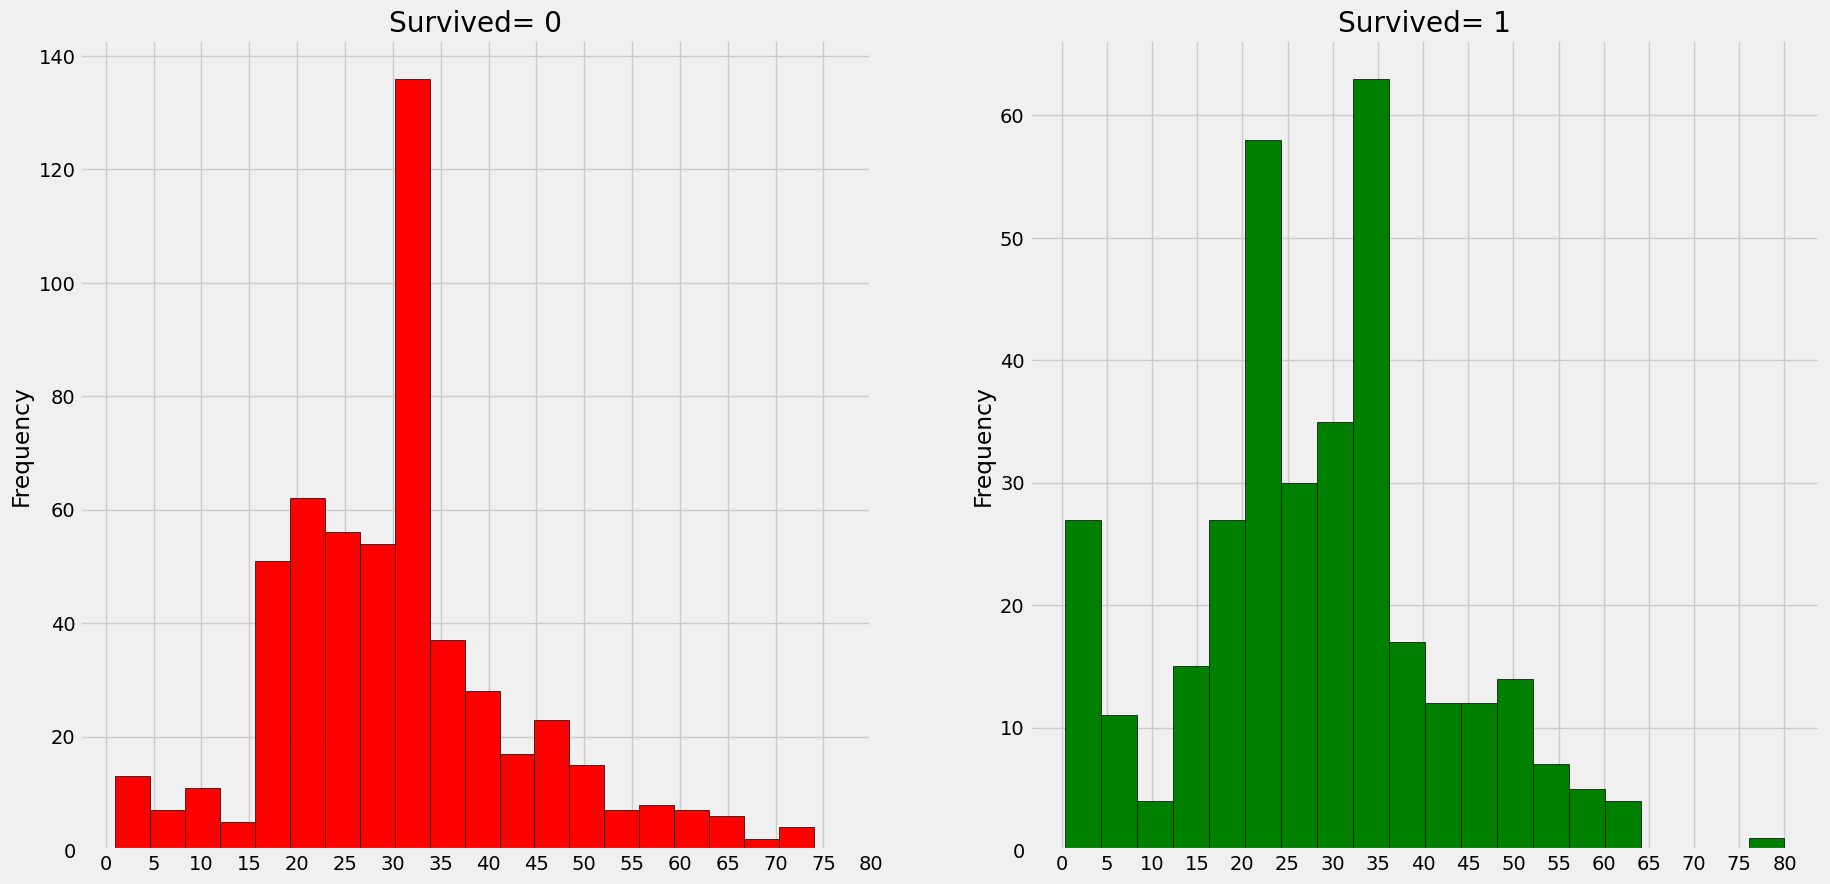

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 관측치:
1. 유아(5세 미만)는 대량으로 구조되었습니다(여성과 아동 우선 정책).

2. 가장 나이가 많은 승객이 구조되었습니다(80년).

3. 최대 사망자 수는 30-40세 연령대였습니다.

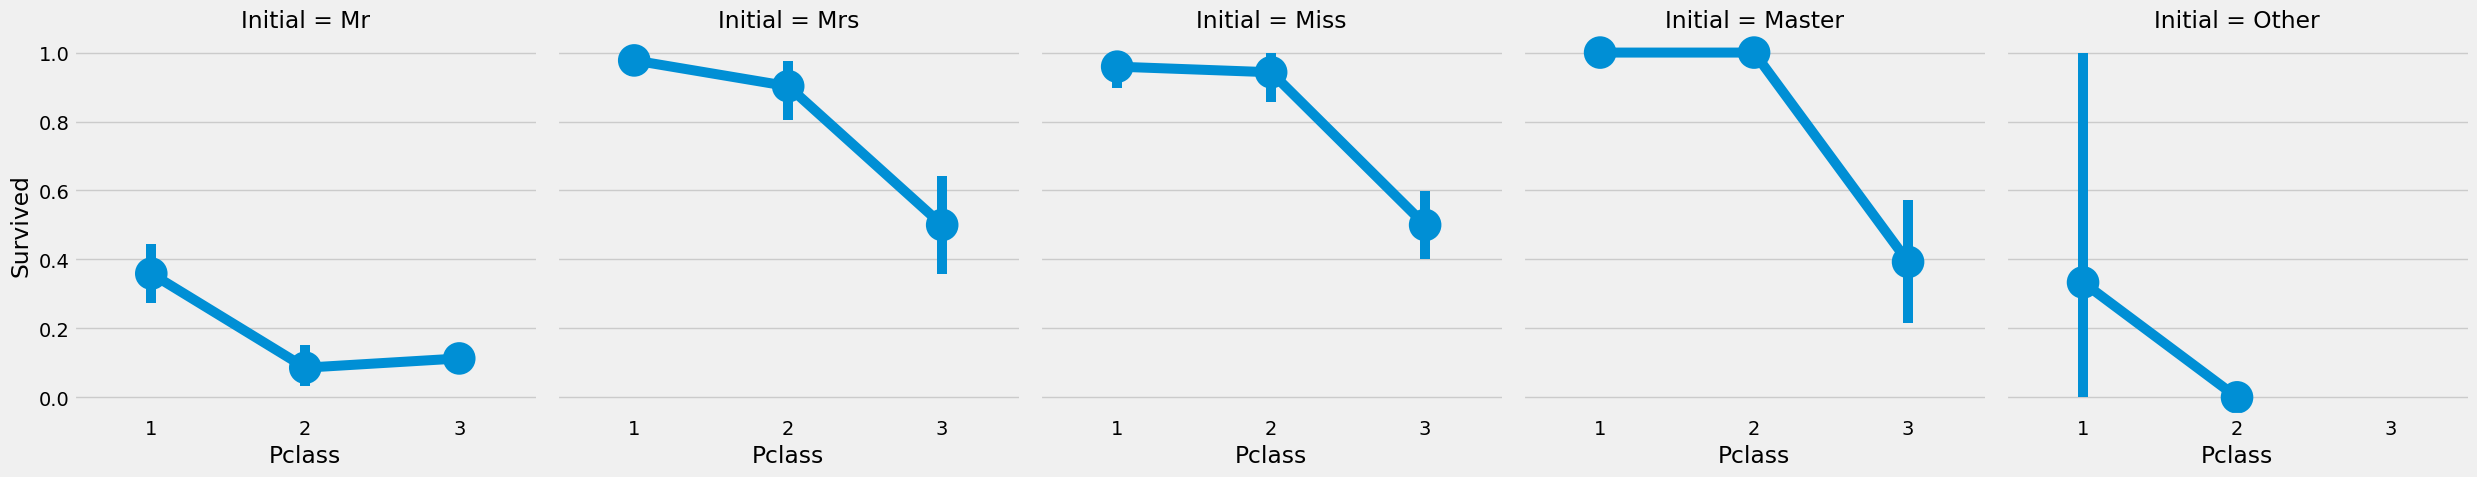

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

따라서 여성과 아동 우선 정책은 계층에 관계없이 적용됩니다.

## Embarked--> Categorical Value

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation(승선항에 의한 생존 가능성)

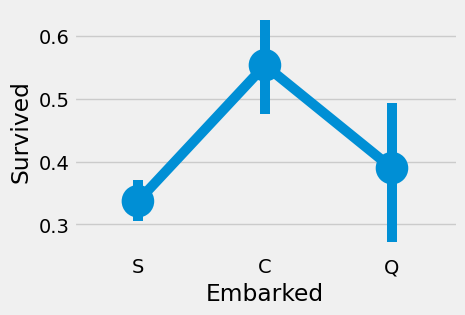

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

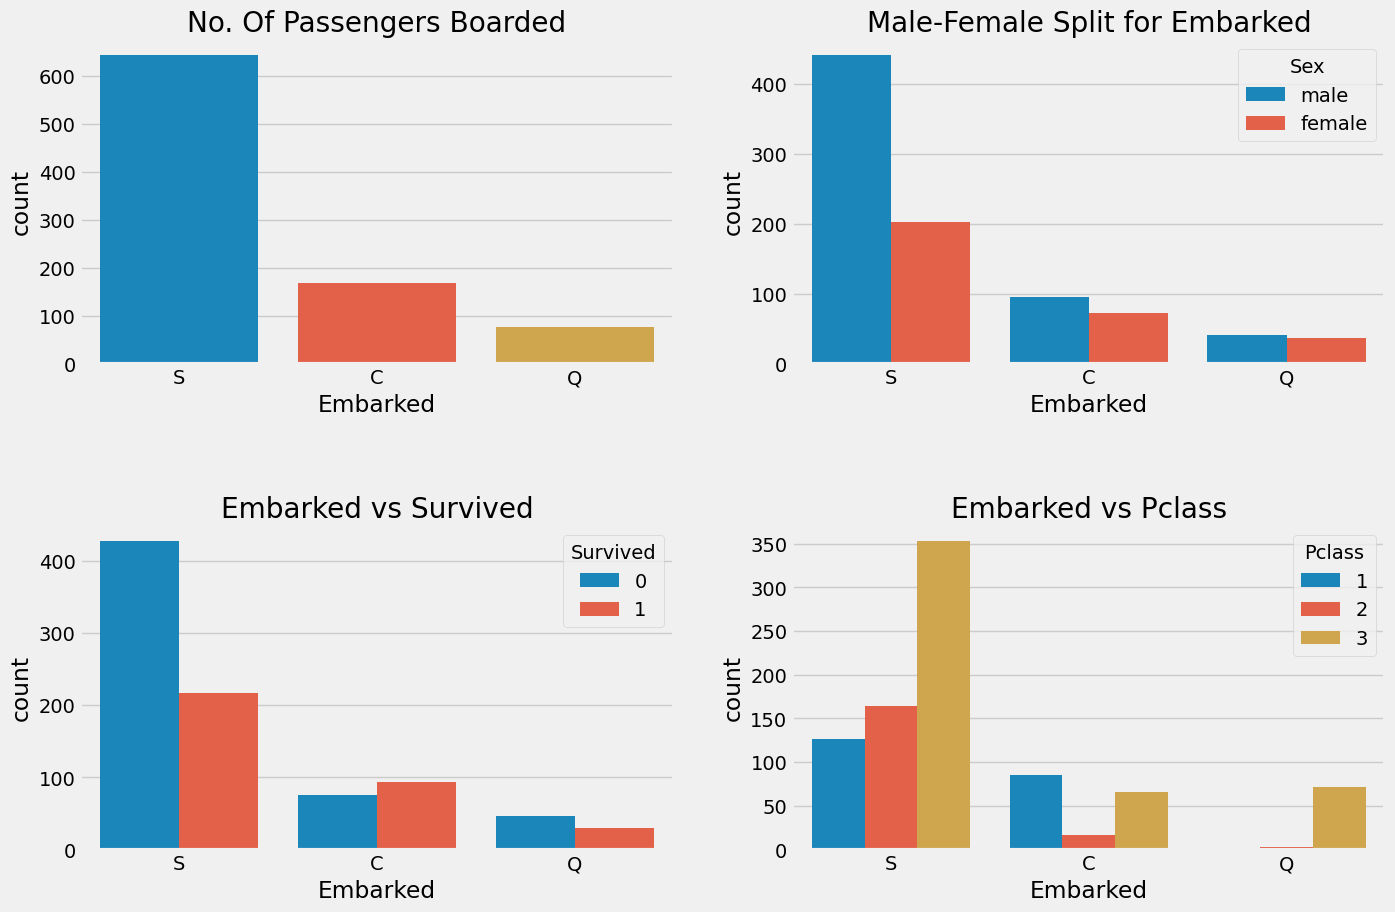

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### 관측치:
1. S에서 탑승한 최대 승객 수. 그들 중 대부분은 Pclass3 출신입니다.

2. C에서 온 승객들은 그들 중 상당 부분이 살아남았기 때문에 운이 좋은 것처럼 보입니다. 그 이유는 모든 Pclass1과 Pclass2 승객의 구조일 수 있습니다.

3. Bage S는 대부분의 부자들이 승선한 항구를 바라봅니다. 여전히 이곳은 생존 가능성이 낮습니다. 왜냐하면 약 **81%**의 Pclass3 승객들이 생존하지 못했기 때문입니다. 

4. 포트 Q는 승객의 거의 95%가 P클래스 3 출신이었습니다.

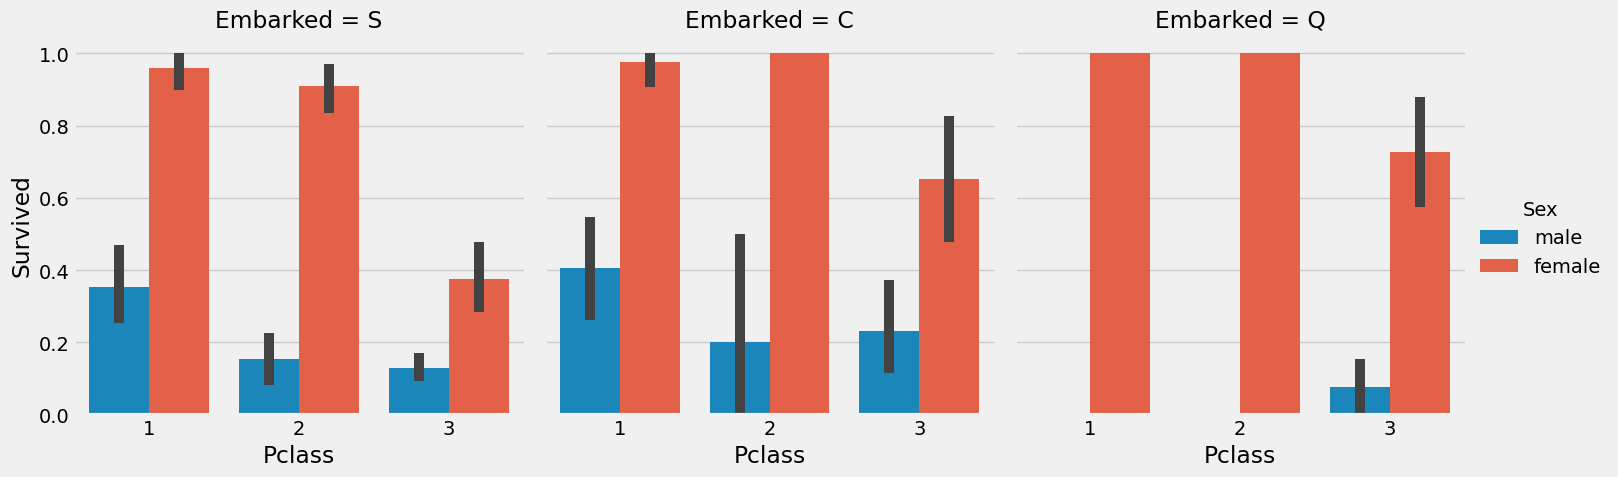

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind="bar")
plt.show()

### 관측치:

1. P 클래스에 관계없이 P 클래스1과 P 클래스2의 여성의 생존 확률은 거의 1입니다.

2. 포트 S는 남성과 여성 모두 생존율이 매우 낮기 때문에 P클래스3 패스네거에게 매우 불행한 것으로 보입니다.**(돈 문제)**

3. 포트 Q는 거의 모두가 P 클래스 3 출신이었기 때문에 남성에게 가장 불행해 보입니다.

### Filling Embarked NaN

우리는 S항에서 최대 승객이 탑승한 것을 보았기 때문에 NaN을 S항으로 대체합니다.

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature
이 기능은 개인이 혼자인지 가족과 함께 있는지 여부를 나타냅니다.

형제자매 = 형제, 자매, 의붓오빠, 의붓언니

배우자 = 남편, 아내

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


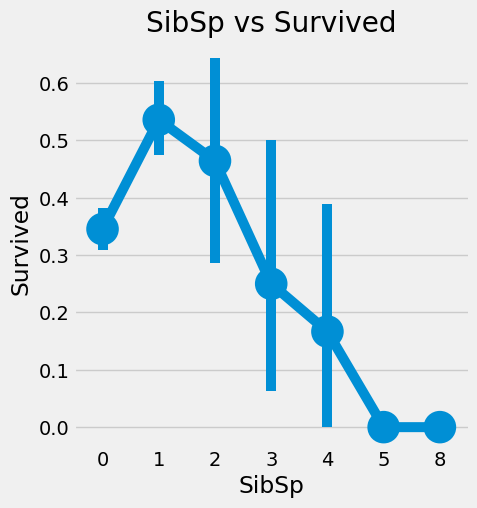

In [ ]:
sns.catplot(x='SibSp',y='Survived',data=data,kind="point")
plt.title('SibSp vs Survived')
plt.show()

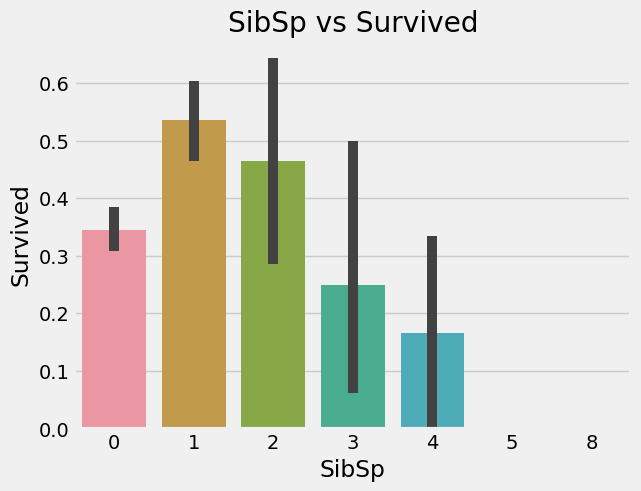

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=data)
plt.title('SibSp vs Survived')
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 관측치:

막대 그래프와 요인 그림을 보면 승객이 형제 없이 혼자 탑승한 경우 생존율이 34.5%라는 것을 알 수 있습니다. 형제자매의 수가 증가하면 그래프는 대략 감소합니다. 이것은 말이 됩니다. 즉, 만약 내가 배에 가족이 있다면, 나는 먼저 나 자신을 구하는 대신 그들을 구하려고 노력할 것입니다. 놀랍게도 5-8인 가족의 생존율은 **0%**입니다. 그 이유는 아마도 Pclass??
|
이유는 **Pclass**입니다. 크로스 탭은 SibSp>3을 가진 사람이 모두 Pclass3에 있었다는 것을 보여줍니다. Pclass3(>3)의 모든 대가족이 사망한 것이 임박했습니다.

## Parch(자식의 수)

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab은 더 큰 가족이 Pclass3에 있었다는 것을 다시 보여줍니다.

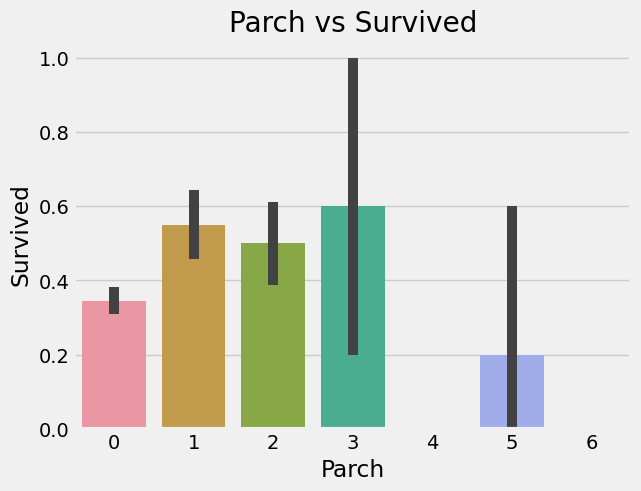

In [ ]:
sns.barplot(x='Parch',y='Survived',data=data)
plt.title('Parch vs Survived')
plt.show()

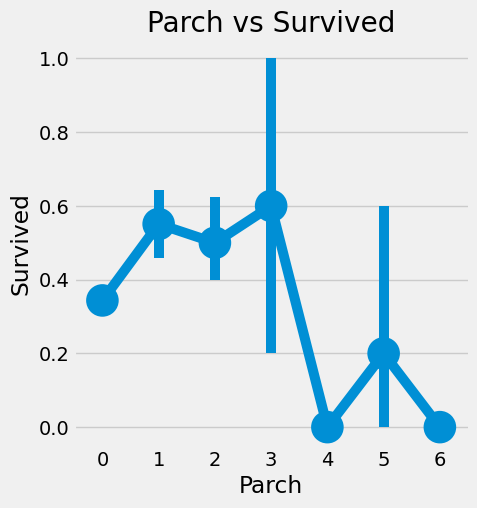

In [ ]:
sns.catplot(x='Parch',y='Survived',data=data,kind="point")
plt.title('Parch vs Survived')
plt.show()

### Observations:

여기서도 결과는 꽤 비슷합니다. 부모님과 함께 탑승한 승객들은 생존 가능성이 더 높습니다. 그러나 숫자가 증가함에 따라 감소합니다.

생존 가능성은 1-3명의 부모가 있는 사람에게 좋습니다. 혼자 있는 것은 또한 치명적이며 배에 4명 이상의 부모가 있을 때 생존 가능성이 감소합니다.

## Fare--> Continous Feature

In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 요금은 **0.0**입니다. 와! 무료 호화로운 놀이기구입니다.

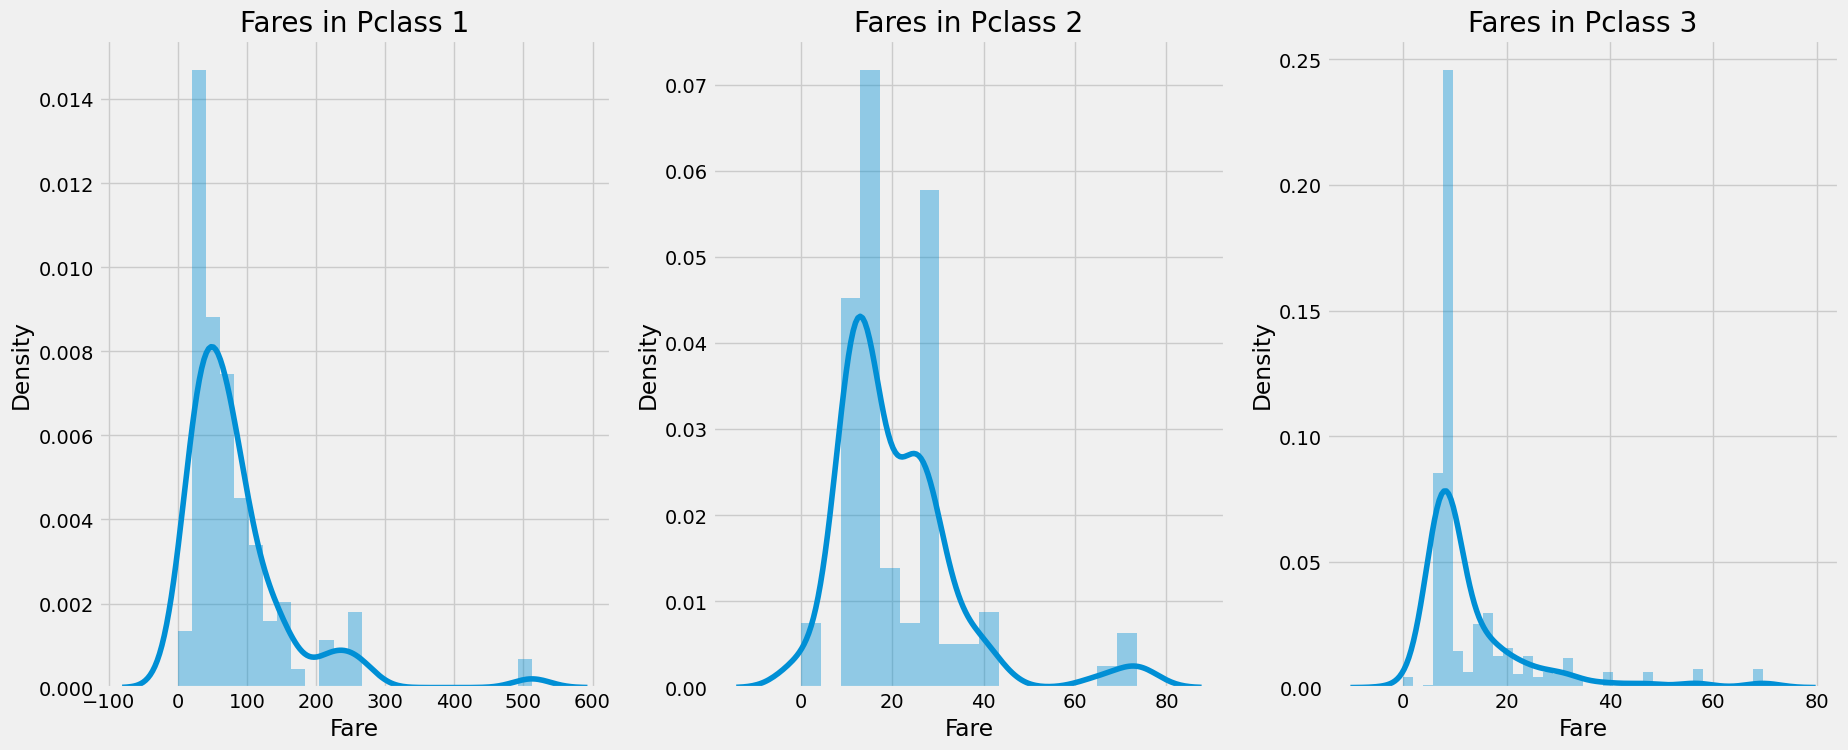

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1의 승객 요금에 큰 분포가 있는 것으로 보이며 이 분포는 표준이 감소함에 따라 계속 감소합니다. 이것도 연속적이기 때문에, 우리는 비닝을 사용하여 이산 값으로 변환할 수 있습니다.

## 모든 형상에 대한 간단한 관찰:
**성:** 여성은 남성에 비해 생존 가능성이 높습니다.

**P 클래스:**1등석 승객이 되면 생존 가능성이 높아진다는 추세가 눈에 띕니다. **Pclass3의 생존율은 매우 낮습니다**. **여성**의 경우 **P클래스1**의 생존 확률은 거의 1이며 **P클래스2***의 생존 확률도 높습니다. *돈이 이깁니다!!!**. 

**나이:** 5-10세 미만의 어린이들은 생존 가능성이 높습니다. 15세에서 35세 사이의 승객들이 많이 죽었습니다.

**승선지:** 매우 흥미로운 특성입니다. **Pclass1 승객의 대다수가 S에서 탑승했음에도 불구하고 C에서의 생존 가능성은 더 좋아 보입니다.** Q의 승객들은 모두 **P 클래스 3** 출신이었습니다. 

**Parch+SibSp:** 1-2명의 형제자매, 배우자 또는 1-3명의 부모를 갖는 것은 혼자이거나 대가족이 함께 여행하는 것보다 더 큰 확률을 보여줍니다.

## Correlation Between The Features(기능 간의 상관 관계)

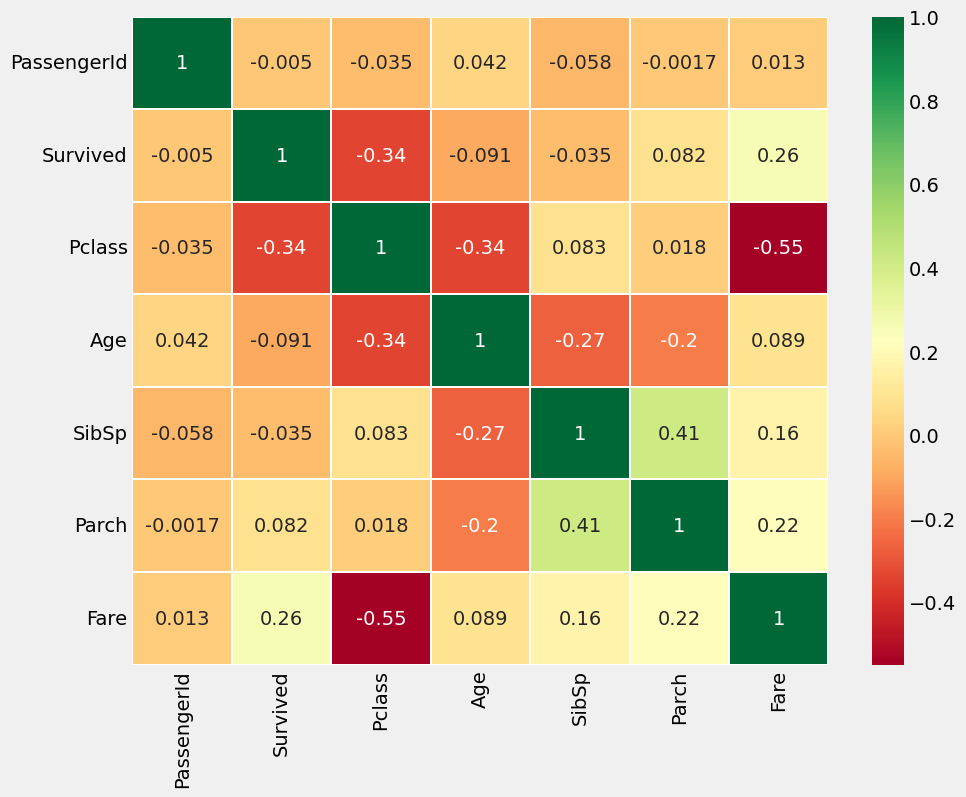

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석

첫 번째로 주목해야 할 것은 알파벳이나 문자열 간의 상관관계가 없다는 것이 명백하기 때문에 숫자 특징만 비교된다는 것입니다. 그림을 이해하기 전에 상관 관계가 정확히 무엇인지 알아보겠습니다.

**양의 상관 관계:** 특성 A의 **증가가 특성 B의 증가로 이어진다면 이들은 양의 상관 관계**입니다. **1 값은 완벽한 양의 상관 관계**를 의미합니다.

**음의 상관 관계:** 기능 A가 **증가하면 기능 B가 감소하면 음의 상관 관계**가 됩니다. **-1 값은 완벽한 음의 상관 관계**를 의미합니다.

이제 두 기능이 매우 또는 완벽하게 상관되어 있으므로 한 기능의 증가가 다른 기능의 증가로 이어진다고 가정해 보겠습니다. 즉, 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 없거나 전혀 없습니다. 이는 **MultiColinarity**로 알려져 있습니다. 두 가지 모두 거의 동일한 정보를 포함하고 있기 때문입니다.

따라서 두 가지 모두 **그 중 하나는 중복**으로 사용해야 한다고 생각하십니까. 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점을 줄이기 때문에 중복 기능을 제거하려고 노력해야 합니다.

이제 위의 열 지도를 통해 특징들이 별로 상관관계가 없다는 것을 알 수 있습니다. 가장 높은 상관 관계는 **SibSp와 Parchi.e 0.41**입니다. 따라서 모든 기능을 계속 수행할 수 있습니다.

## 파트 2: 기능 엔지니어링 및 데이터 정리

이제 기능 엔지니어링이란 무엇입니까?

기능이 포함된 데이터 세트가 제공될 때마다 모든 기능이 중요할 필요는 없습니다. 제거해야 할 중복 기능이 많이 있을 수 있습니다. 또한 다른 기능을 관찰하거나 정보를 추출하여 새로운 기능을 추가하거나 추가할 수 있습니다.

예를 들어 이름 기능을 사용하여 초기 기능을 얻는 것입니다. 새로운 기능을 추가하고 몇 가지 기능을 제거할 수 있는지 살펴보겠습니다. 또한 기존의 관련 기능을 예측 모델링에 적합한 형태로 변환할 것입니다.

## Age_band

#### 연령 특성에 대한 문제:
앞서 **나이는 연속적인 특징 **이라고 언급했듯이 머신 러닝 모델의 연속 변수에 문제가 있습니다.

**예:**스포츠 인물을 **Sex**로 그룹화하거나 정렬하라고 하면 남성과 여성으로 쉽게 구분할 수 있습니다.

이제 제가 그들을 **나이**로 그룹화하라고 하면, 어떻게 하시겠습니까? 30명인 경우 연령 값이 30개가 될 수 있습니다. 이것은 문제가 있습니다.

우리는 이러한 연속 값을 Binning 또는 Normalization을 통해 범주형 값으로 변환해야 합니다. 나는 빈을 사용할 것입니다. 즉, 다양한 연령을 단일 빈으로 그룹화하거나 단일 값을 사용합니다.

그럼 승객의 최대 연령은 80세였군요. 이제 0-80 범위를 5개의 빈으로 나눕니다. 그래서 80/5=16.
16사이즈 통입니다.

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


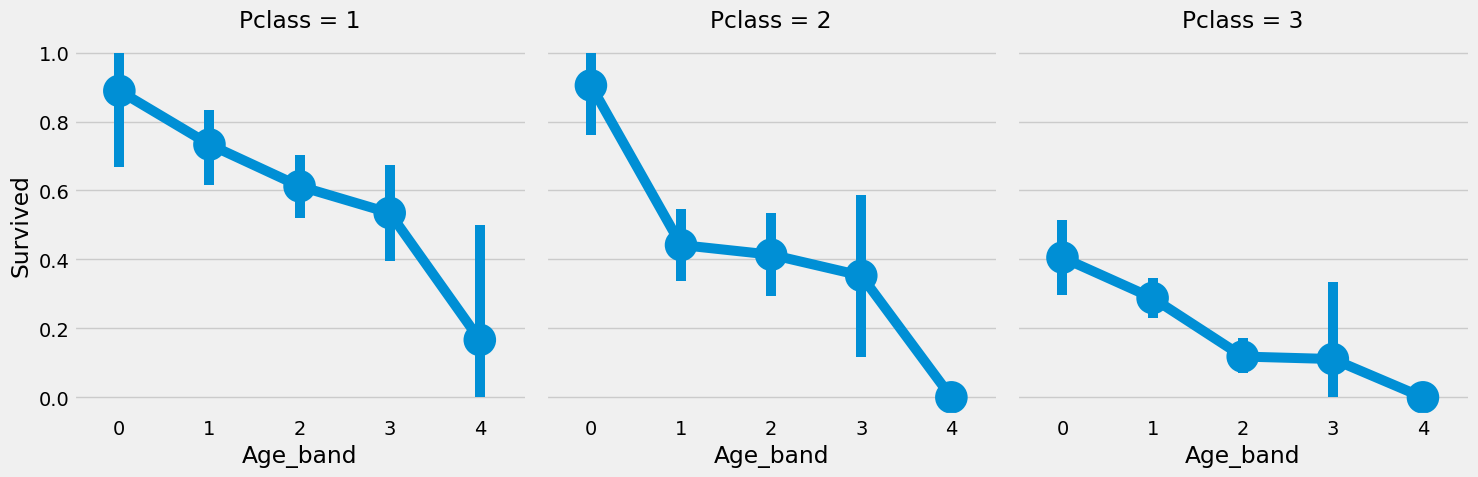

In [ ]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind="point" )
plt.show()

사실은..생존율은 P 클래스에 관계없이 연령이 증가함에 따라 감소합니다.

## 패밀리_사이즈와 혼자
이 시점에서 "Family_size" 및 "Alone"이라는 새 기능을 생성하여 분석할 수 있습니다. 이 기능은 Parch와 SibSp의 합계입니다. 그것은 우리에게 결합된 데이터를 제공합니다. 그래서 우리는 생존율이 승객의 가족 크기와 관련이 있는지 확인할 수 있습니다. 혼자라는 것은 승객이 혼자인지 아닌지를 나타냅니다.

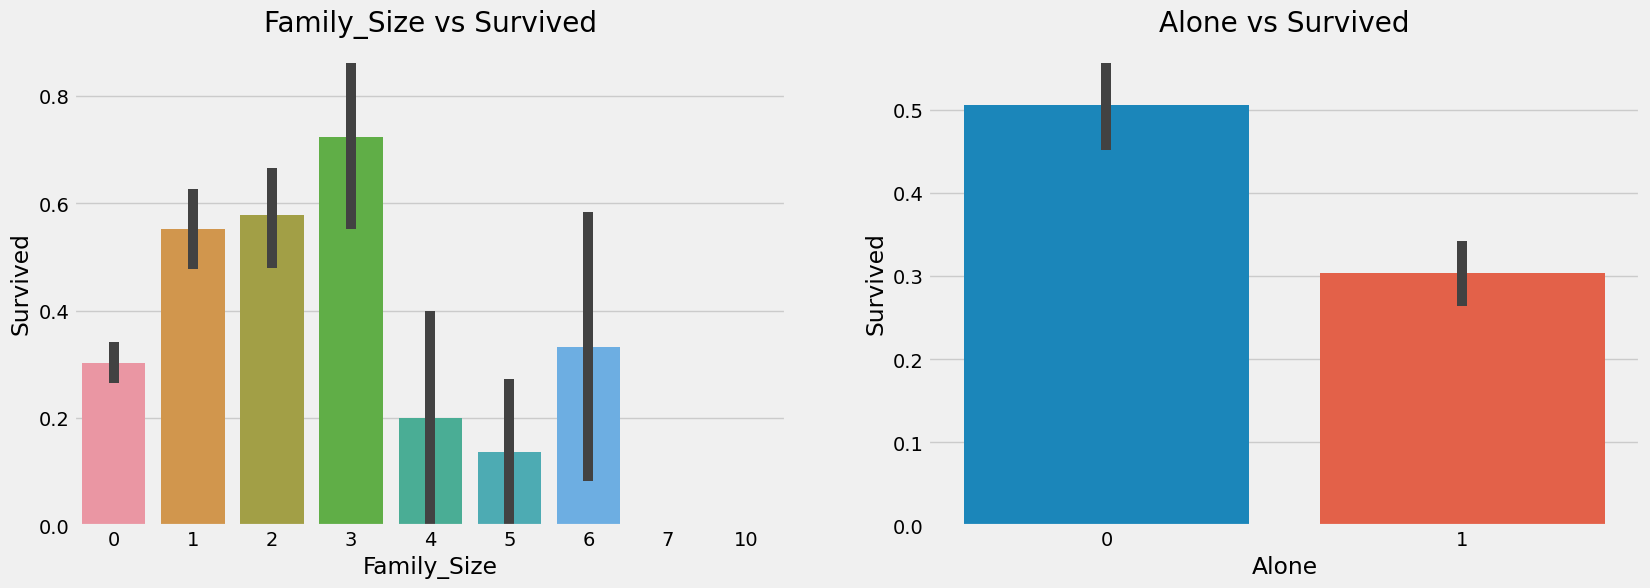

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.barplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0은 승객이 혼자라는 것을 의미합니다.** 분명히, 혼자이거나 family_size=0인 경우 생존 가능성은 매우 낮습니다. 가족 크기가 4명 이상일 경우, 가능성도 줄어듭니다. 이것은 또한 모델에 중요한 기능으로 보입니다. 이것을 더 자세히 살펴보도록 하겠습니다.

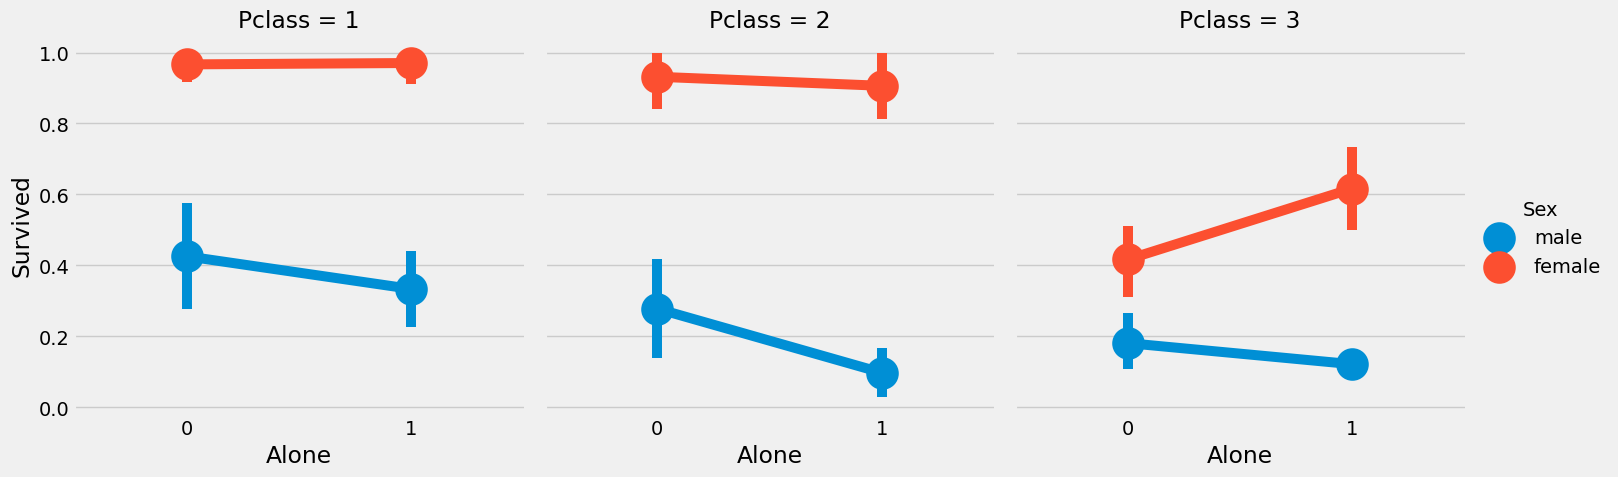

In [ ]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind="point")
plt.show()

가족이 있는 여성보다 혼자 있을 확률이 높은 Pclass3를 제외하고는 Sex, Pclass와 상관없이 혼자 있는 것이 유해하다는 것을 알 수 있습니다.

## 요금_범위

요금도 연속적인 특징이기 때문에, 우리는 그것을 서수 값으로 변환해야 합니다. 이를 위해 **pandas.qcut**을 이용.

따라서 **qcut**은 전달된 빈 수에 따라 값을 나누거나 정렬합니다. 따라서 5개의 빈을 통과하면 값이 5개의 개별 빈 또는 값 범위로 동일하게 배열됩니다.

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이 **fare_range가 증가함에 따라 생존 가능성이 증가함을 분명히 알 수 있습니다.**

이제 Fare_Range 값을 그대로 전달할 수 없습니다. **Age_Band**에서 했던 것과 동일한 싱글톤 값으로 변환해야 합니다

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

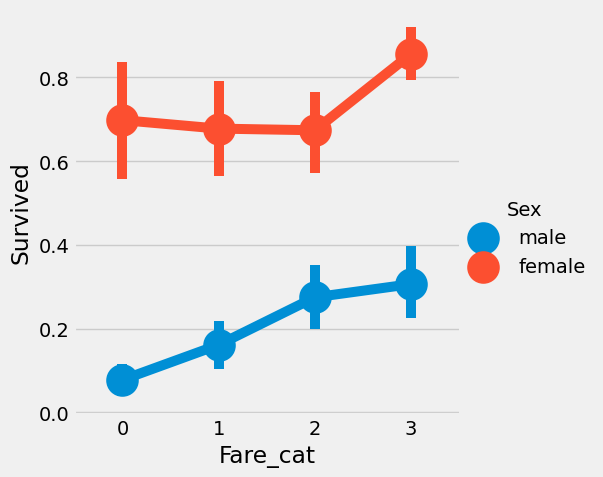

In [ ]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex',kind='point')
plt.show()

분명히, Fare_cat이 증가할수록 생존 가능성은 증가합니다. 이 피쳐는 Sex와 함께 모델링하는 동안 중요한 피쳐가 될 수 있습니다.

## 문자열 값을 숫자로 변환

기계 학습 모델에 문자열을 전달할 수 없기 때문에 Sex, Jagained 등과 같은 기능을 숫자 값으로 변환해야 합니다.

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### 불필요한 기능 삭제

**이름**--> 이름 기능은 범주형 값으로 변환할 수 없으므로 필요하지 않습니다.

**Age**--> 저희는 Age_band 기능이 있으니 이것은 필요 없습니다.

**티켓**--> 분류할 수 없는 임의의 문자열입니다.

**Fare**--> Fare_cat 기능이 있어서 필요 없습니다

**캐빈**--> 많은 NaN 값과 많은 승객이 여러 개의 캐빈을 보유하고 있습니다. 그래서 이것은 쓸모없는 기능입니다.

**Fare_Range**--> fare_cat 기능이 있습니다.

**PassengerId**--> 분류할 수 없습니다.

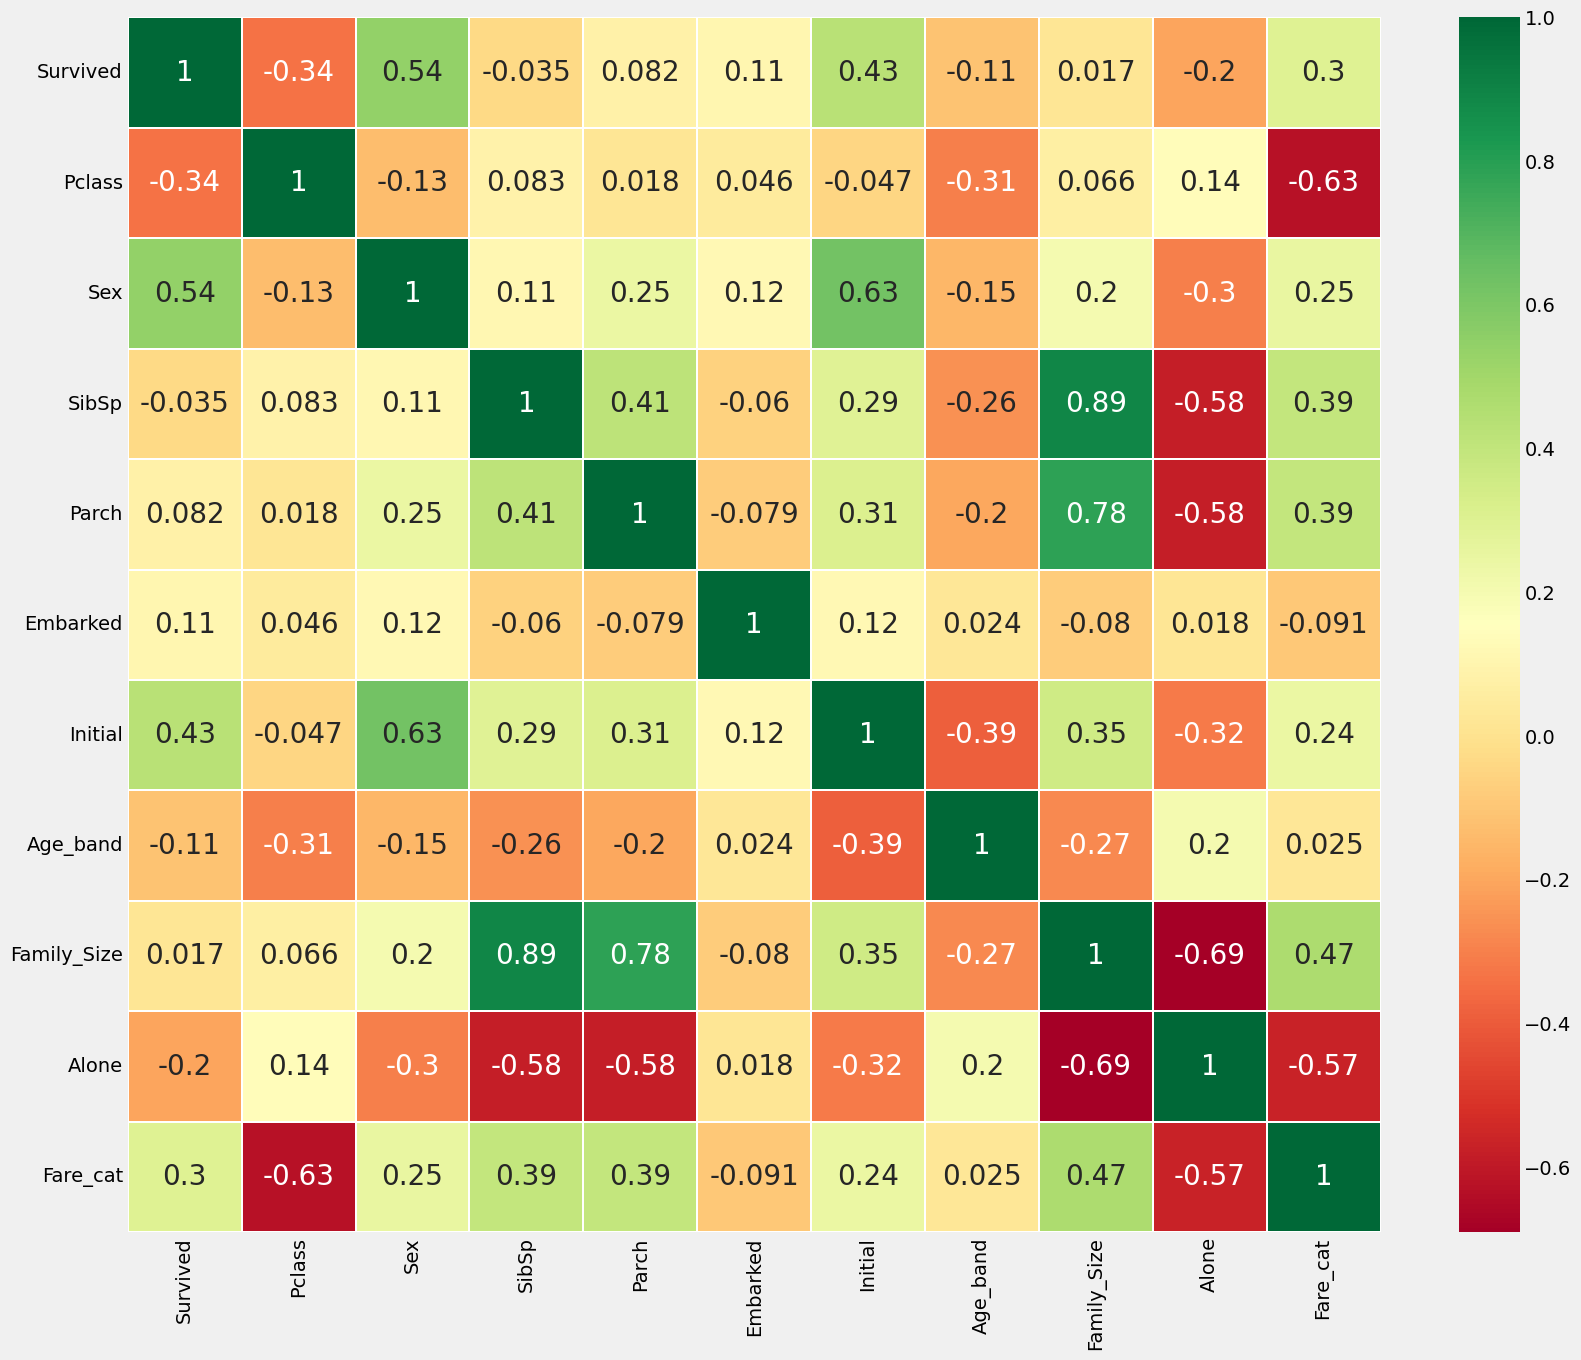

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관 관계 그림에서 몇 가지 긍정적인 관련 기능을 확인할 수 있습니다. 일부는 **SibSpandd Family_Size** 및 **Parch and Family_Size**이고 일부는 **Alone 및 Family_Size와 같은 부정적인 것입니다.**

# 파트 3: 예측 모델링

우리는 EDA 부분에서 몇 가지 통찰력을 얻었습니다. 하지만 그것으로 우리는 승객이 살아남을 것인지 죽을 것인지를 정확하게 예측하거나 말할 수 없습니다. 그래서 이제 우리는 몇몇 훌륭한 분류 알고리즘을 사용하여 승객의 생존 여부를 예측할 것입니다.모델을 만드는 데 사용할 알고리즘은 다음과 같습니다:

1. 로지스틱 회귀 분석

2. 서포트 벡터 머신(선형 및 방사형)

3. 랜덤 포레스트

4. K-인근 이웃들

5. 나이브 베이즈

6. 의사 결정 트리

7. 로지스틱 회귀 분석

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8059701492537313


### K-Nearest Neighbours(KNN)

In [ ]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

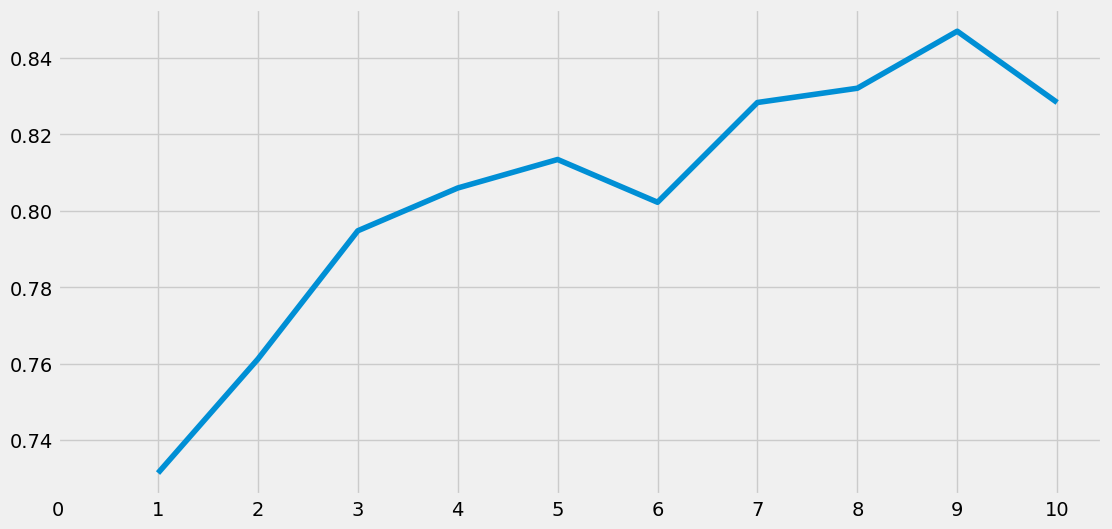

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


모델의 정확성이 분류기의 견고성을 결정하는 유일한 요인은 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되며 90%의 정확도를 기록한다고 가정해 보겠습니다.

이제 이것은 분류기에 매우 좋은 정확도인 것처럼 보이지만, 우리는 그것이 다가오는 모든 새로운 테스트 세트에 대해 90%가 될 것이라는 것을 확인할 수 있습니까? 정답은 **아니오**입니다. 분류자가 자체 훈련에 사용할 모든 인스턴스를 결정할 수는 없기 때문입니다. 교육 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가하거나 감소할 수 있습니다. 이를 **모형 분산**이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 **교차 검증**을 사용합니다.


# 교차 검증

대부분의 경우 데이터가 불균형 상태입니다. 즉, 클래스 1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 우리는 데이터 세트의 각 인스턴스에서 알고리듬을 훈련하고 테스트해야 합니다. 그런 다음 우리는 데이터 세트에 대해 언급된 모든 정확도의 평균을 취할 수 있습니다. 

1. K-Fold 교차 검증은 먼저 데이터 세트를 k-부분 집합으로 분할하여 작동합니다.

2. 데이터 세트를 (k=5)개의 부분으로 나눈다고 가정합니다. 우리는 테스트를 위해 1개의 파트를 예약하고 4개의 파트에 걸쳐 알고리즘을 교육합니다.

3. 우리는 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 교육함으로써 프로세스를 계속합니다. 정확도와 오류는 알고리즘의 평균 정확도를 얻기 위해 평균화됩니다.

이를 K-Fold 교차 검증이라고 합니다.

4. 알고리즘은 일부 교육 데이터에 대한 데이터 세트에 비해 부족할 수 있으며 때로는 다른 교육 세트에 대한 데이터에 대해 지나치게 적합할 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있습니다.

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805868,0.047530
Naive Bayes,0.795843,0.054861
Random Forest,0.811486,0.045533


<Axes: >

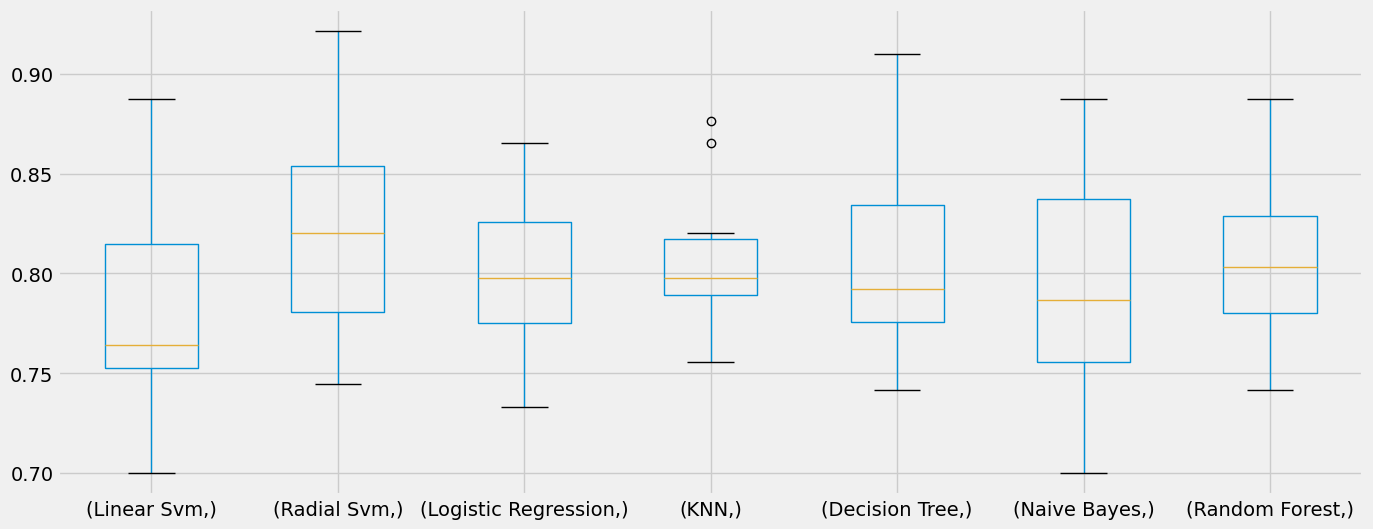

In [ ]:
plt.subplots(figsize=(15,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

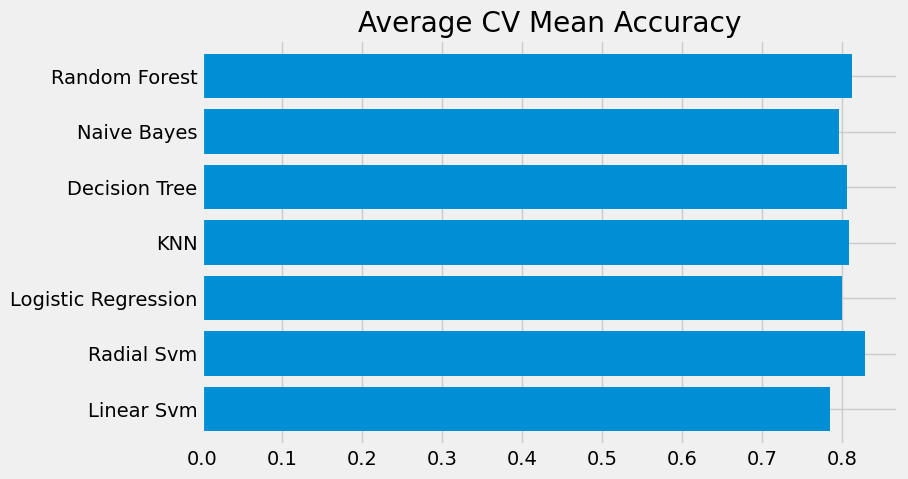

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

불균형으로 인해 분류 정확도가 잘못될 수 있습니다. 우리는 혼란 행렬의 도움을 받아 요약된 결과를 얻을 수 있는데, 이는 모델이 어디서 잘못되었는지 또는 모델이 어떤 클래스를 잘못 예측했는지를 보여줍니다.

## 혼동 행렬

분류자가 작성한 올바른 분류와 잘못된 분류의 수를 제공합니다.

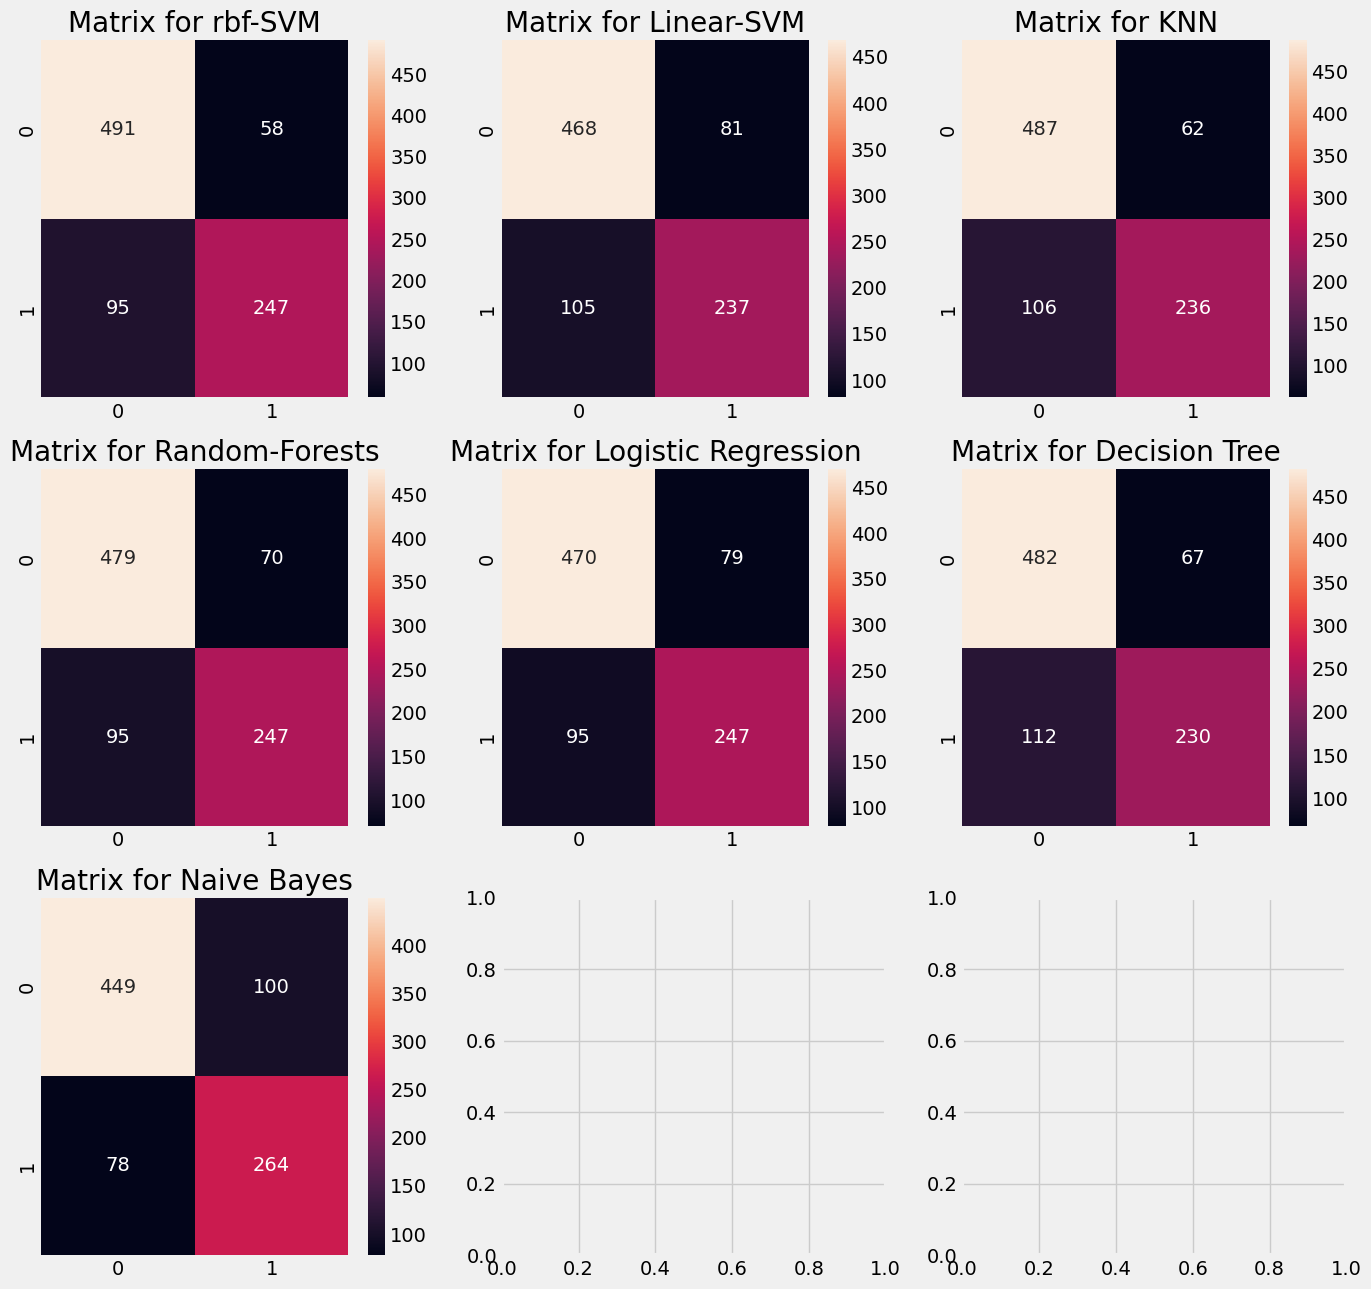

In [ ]:
f,ax=plt.subplots(3,3,figsize=(15,15))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### 혼동 행렬 해석

왼쪽 대각선은 각 클래스에 대해 수행된 올바른 예측의 수를 표시하고 오른쪽 대각선은 잘못된 예측의 수를 표시합니다. rbf-SVM에 대한 첫 번째 그림을 고려해 보겠습니다:

1. 정확한 예측 수는 **491(사망) + 247(생존)입니다** 평균 CV 정확도는 **(491+247)/891 = 82.8입니다%** 우리가 더 일찍 얻은 것.

2. **Errors**--> 58명의 사망자를 생존자로 잘못 분류하고 95명은 사망자로 생존했습니다. 그래서 죽은 사람을 생존자로 예측함으로써 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴봄으로써, 우리는 rbf-SVM이 사망한 승객을 정확하게 예측할 확률이 더 높지만 NiveBayes는 생존한 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

### 하이퍼 파라미터 조정

기계 학습 모델은 블랙박스와 같습니다. 이 Black-Box에는 몇 가지 기본 매개 변수 값이 있으며, 이 값을 조정하거나 변경하여 더 나은 모델을 얻을 수 있습니다. SVM 모델의 C 및 감마와 마찬가지로 서로 다른 분류기에 대한 유사한 매개 변수를 하이퍼 매개 변수라고 하는데, 이 매개 변수를 조정하여 알고리듬의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있습니다. 이를 하이퍼 파라미터 조정이라고 합니다.

우리는 SVM과 랜덤 포레스트와 같은 두 가지 최상의 분류자에 대한 하이퍼 파라미터를 조정할 것입니다.

#### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-Svm의 최고 점수는 **82.82%이며 C=0.05 및 감마=0입니다.1**.
랜덤 포레스트의 경우 점수는 **n_computators=900**로 약 **81.8%**입니다.

# 앙상블

조립은 모델의 정확도나 성능을 높이는 좋은 방법입니다. 간단히 말해서, 그것은 다양한 단순한 모델의 조합으로 하나의 강력한 모델을 만드는 것입니다.

우리가 전화기를 구입하고 다양한 매개변수를 기반으로 많은 사람들에게 문의하고 싶다고 가정해 보겠습니다. 따라서 우리는 모든 다른 파라미터를 분석한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 모델의 안정성을 높여주는 **Ensembling**입니다. 조립은 다음과 같은 방법으로 수행할 수 있습니다:

1. 투표 분류기

2. 배깅

3. 부스팅.

## 투표 분류기

이것은 다양한 간단한 기계 학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 제공합니다. 하위 모델 또는 기본 모델은 모두 다양한 유형입니다.

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


## Bagging

배깅은 일반적인 앙상블 방식입니다. 데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취함으로써 작동합니다. 평균화로 인해 분산이 감소합니다. 투표 분류기와 달리 배깅은 유사한 분류기를 사용합니다.

#### Bagged KNN

분산이 많은 모형에서는 배깅이 가장 잘 작동합니다. 예를 들어 의사 결정 트리 또는 임의 포리스트를 들 수 있습니다. 작은 값 **n_neighbors**를 가진 KNN을 작은 값 n_neighbors로 사용할 수 있습니다.

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Bagged DecisionTree


In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## 부스팅

부스팅은 분류기의 순차 학습을 사용하는 앙상블 기술입니다. 약한 모델을 단계적으로 개선하는 것입니다.부스팅은 다음과 같이 작동합니다:

모델은 먼저 전체 데이터 세트에 대해 훈련됩니다. 이제 모델은 일부 인스턴스는 올바르게 처리하고 일부 인스턴스는 잘못 처리합니다. 이제 다음 반복에서는 학습자가 잘못 예측된 사례에 더 집중하거나 더 많은 가중치를 부여합니다. 따라서 잘못된 인스턴스를 정확하게 예측하려고 합니다. 이제 이 반복 프로세스는 연속적으로 진행되며, 정확도의 한계에 도달할 때까지 새로운 분류기가 모델에 추가됩니다.

#### AdaBoost(어댑티브 부스팅)

이 경우 취약한 학습자 또는 추정자는 의사결정 트리입니다.  그러나 dafault base_estimator를 원하는 알고리즘으로 변경할 수 있습니다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting(확률적 경사 부스팅)

여기에도 약한 학습자는 의사 결정 트리입니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


우리는 에이다부스트의 정확도가 가장 높습니다. 하이퍼 파라미터 튜닝을 통해 증가하도록 노력할 것입니다

#### AdaBoost를 위한 하이퍼 파라미터 조정

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost를 통해 얻을 수 있는 최대 정확도는 **83.16%이며 n_computers=200 및 learning_rate=0.05**입니다

### Confusion Matrix for the Best Model(최상의 모델에 대한 혼동 행렬)

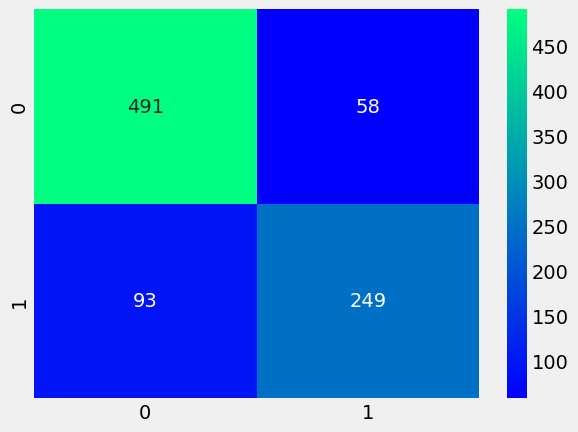

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

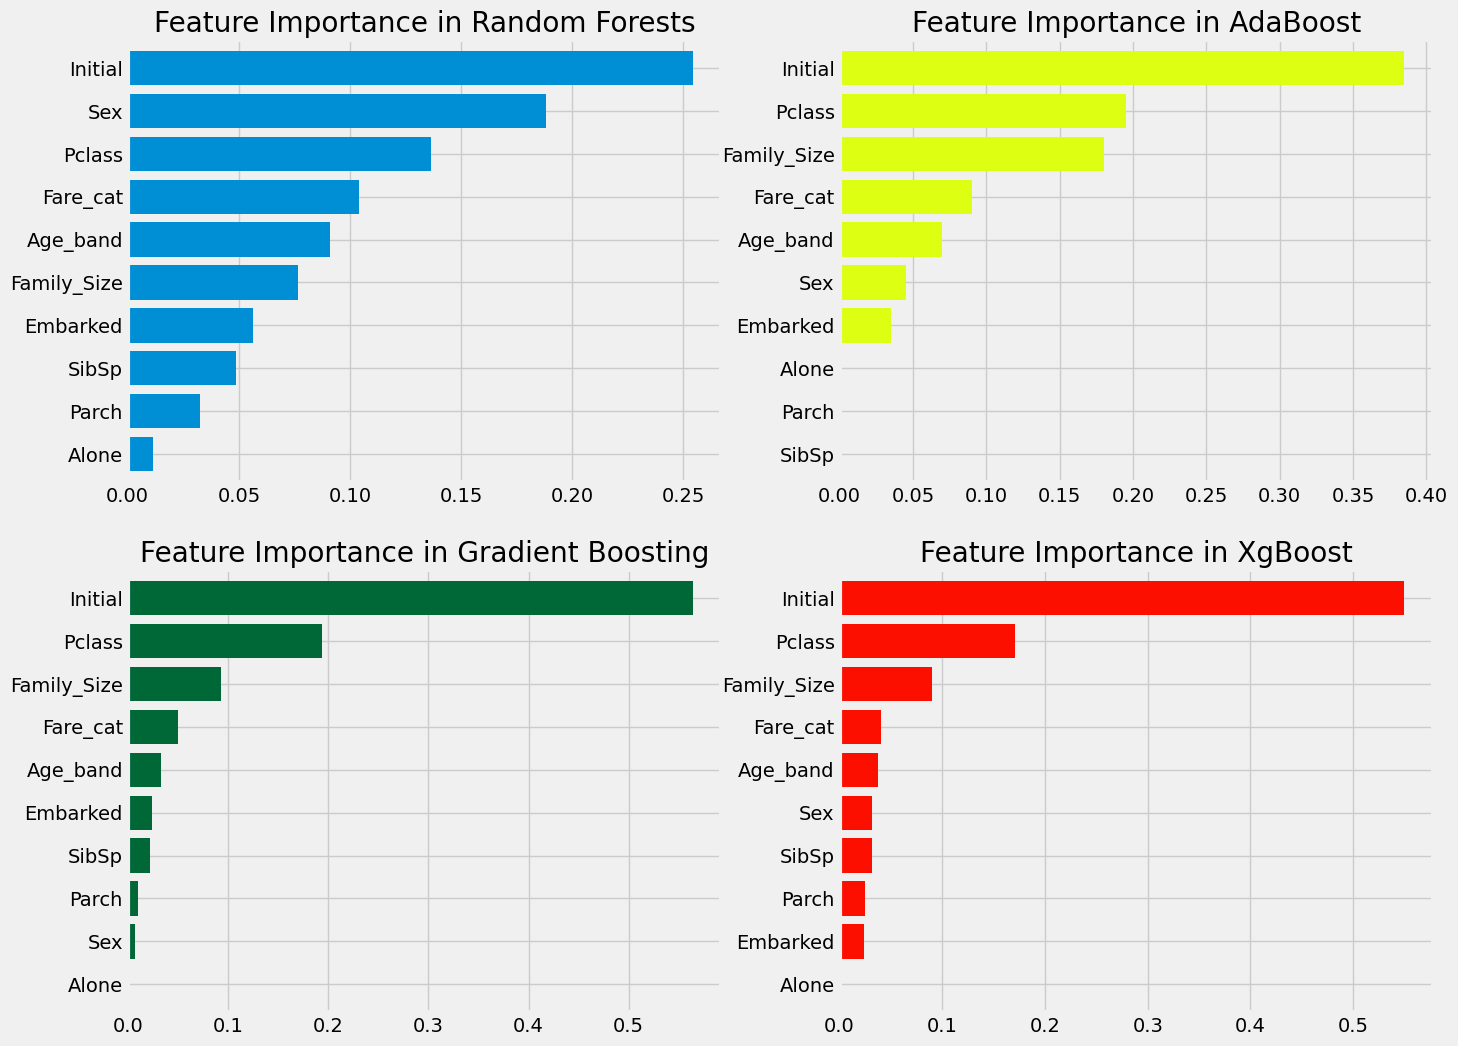

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

랜덤 포레스트, 에이다부스트 등 다양한 분류기의 중요한 기능을 확인할 수 있습니다.

#### 관측치:

1. 일반적으로 중요한 기능으로는 이니셜, Fare_cat, Pclass, 패밀리_Size 등이 있습니다.

2. Sex 기능은 중요성을 부여하지 않는 것으로 보이는데, 앞서 살펴본 바와 같이 Sex와 Pclass의 결합은 매우 우수한 차별화 요소를 제공하고 있었습니다. 섹스는 랜덤 포레스트에서만 중요해 보입니다.

그러나 많은 분류기에서 맨 위에 있는 Initial 기능을 볼 수 있습니다.우리는 이미 섹스와 이니셜 사이의 긍정적인 상관관계를 보았기 때문에 둘 다 성별을 가리킵니다.

3. 마찬가지로 Pclass 및 Fare_cat는 승객 및 Family_Size with Alone, Parch 및 SibSp의 상태를 나타냅니다.

저는 여러분 모두가 머신러닝에 대한 통찰력을 얻었기를 바랍니다. 기계 학습을 위한 다른 훌륭한 노트북은 다음과 같습니다:
1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
